In [3]:
%pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('aberdeen_home_sales.csv')
print(df.head())

     MLSNumber Category  Status  DOM  CDOM ListDate  \
0  MDHR2039862      RES  Closed    3     3  2/15/25   
1  MDHR2039994      RES  Closed    3     3  2/14/25   
2  MDHR2039772      RES  Closed    4     4   2/2/25   
3  MDHR2039706      RES  Closed    3     3   2/5/25   
4  MDHR2039450      RES  Closed    6     6  1/30/25   

  Agreement of Sale/Signed Lease Date OffMarketDate SettledDate OriginalPrice  \
0                        2/26/25 0:00       3/18/25     3/18/25     $150,000    
1                        2/25/25 0:00       3/11/25     3/11/25     $295,000    
2                        2/17/25 0:00       3/18/25     3/18/25     $335,000    
3                        2/16/25 0:00       3/19/25     3/19/25     $234,000    
4                        2/12/25 0:00       3/13/25     3/13/25     $229,900    

   ... Central Air YN Waterfront YN New Construction YN AdditionalBankOwned  \
0  ...             No            No                  No        StandardSale   
1  ...             No   

In [5]:
#show all column names 
print(df.columns)

Index(['MLSNumber', 'Category', 'Status', 'DOM', 'CDOM', 'ListDate',
       'Agreement of Sale/Signed Lease Date', 'OffMarketDate', 'SettledDate',
       'OriginalPrice', 'List Price', 'SoldPrice', 'StreetNumber',
       'StreetDirection', 'StreetName', 'UnitNumber', 'City', 'State',
       'Zip Code', 'County', 'Subdivision', 'ListAgentName', 'ListAgentCode',
       'ListOfficeName', 'ListOfficeCode', 'ListOfficePhone', 'SellingAgent',
       'SellingAgentCode', 'SellingOfficeName', 'SellingOfficeCode',
       'SellingOfficePhone', 'FinalFinancing', 'FinalShortSale',
       'FinalThirdPartyApproval', 'FinalBankOwned', 'TaxAnnualTotal',
       'TaxYear', 'AcresTotal', 'LandUseCode', 'Ownership',
       'Senior Community YN', 'Condo/Coop Assoc YN', 'HOA YN',
       'One-TimeAssociationFee', 'AssociationFee', 'AssociationFeeFrequency',
       'YearBuilt', 'Age', 'InteriorSqFt', 'PropertyCondition', 'Bedrooms',
       'BathsFull', 'BathsHalf', 'Design', 'Style', 'NumberofStories',
       

In [6]:
#testing results 
df['SettledDate'] = pd.to_datetime(df['SettledDate'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   MLSNumber                            1956 non-null   object        
 1   Category                             1956 non-null   object        
 2   Status                               1956 non-null   object        
 3   DOM                                  1956 non-null   int64         
 4   CDOM                                 1956 non-null   int64         
 5   ListDate                             1956 non-null   object        
 6   Agreement of Sale/Signed Lease Date  1956 non-null   object        
 7   OffMarketDate                        1956 non-null   object        
 8   SettledDate                          1956 non-null   datetime64[ns]
 9   OriginalPrice                        1956 non-null   object        
 10  List Price  

/var/folders/nj/lczp9gn915v1nmhr2qwk8zrm0000gn/T/ipykernel_46995/3763820701.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SettledDate'] = pd.to_datetime(df['SettledDate'])


In [7]:
print(df.columns)

Index(['MLSNumber', 'Category', 'Status', 'DOM', 'CDOM', 'ListDate',
       'Agreement of Sale/Signed Lease Date', 'OffMarketDate', 'SettledDate',
       'OriginalPrice', 'List Price', 'SoldPrice', 'StreetNumber',
       'StreetDirection', 'StreetName', 'UnitNumber', 'City', 'State',
       'Zip Code', 'County', 'Subdivision', 'ListAgentName', 'ListAgentCode',
       'ListOfficeName', 'ListOfficeCode', 'ListOfficePhone', 'SellingAgent',
       'SellingAgentCode', 'SellingOfficeName', 'SellingOfficeCode',
       'SellingOfficePhone', 'FinalFinancing', 'FinalShortSale',
       'FinalThirdPartyApproval', 'FinalBankOwned', 'TaxAnnualTotal',
       'TaxYear', 'AcresTotal', 'LandUseCode', 'Ownership',
       'Senior Community YN', 'Condo/Coop Assoc YN', 'HOA YN',
       'One-TimeAssociationFee', 'AssociationFee', 'AssociationFeeFrequency',
       'YearBuilt', 'Age', 'InteriorSqFt', 'PropertyCondition', 'Bedrooms',
       'BathsFull', 'BathsHalf', 'Design', 'Style', 'NumberofStories',
       

In [8]:
# Convert the 'SettledDate' column to datetime format
#start by fixing the date format which isn't converting properly 
df['SettledDate']=pd.to_datetime(df['SettledDate'], unit='s')
print(df['SettledDate'].head())
year = df['SettledDate'].dt.year
print(year.head())
df['Year'] = year
print(df.head())
print(df.info())

0   2025-03-18
1   2025-03-11
2   2025-03-18
3   2025-03-19
4   2025-03-13
Name: SettledDate, dtype: datetime64[ns]
0    2025
1    2025
2    2025
3    2025
4    2025
Name: SettledDate, dtype: int32
     MLSNumber Category  Status  DOM  CDOM ListDate  \
0  MDHR2039862      RES  Closed    3     3  2/15/25   
1  MDHR2039994      RES  Closed    3     3  2/14/25   
2  MDHR2039772      RES  Closed    4     4   2/2/25   
3  MDHR2039706      RES  Closed    3     3   2/5/25   
4  MDHR2039450      RES  Closed    6     6  1/30/25   

  Agreement of Sale/Signed Lease Date OffMarketDate SettledDate OriginalPrice  \
0                        2/26/25 0:00       3/18/25  2025-03-18     $150,000    
1                        2/25/25 0:00       3/11/25  2025-03-11     $295,000    
2                        2/17/25 0:00       3/18/25  2025-03-18     $335,000    
3                        2/16/25 0:00       3/19/25  2025-03-19     $234,000    
4                        2/12/25 0:00       3/13/25  2025-03-13   

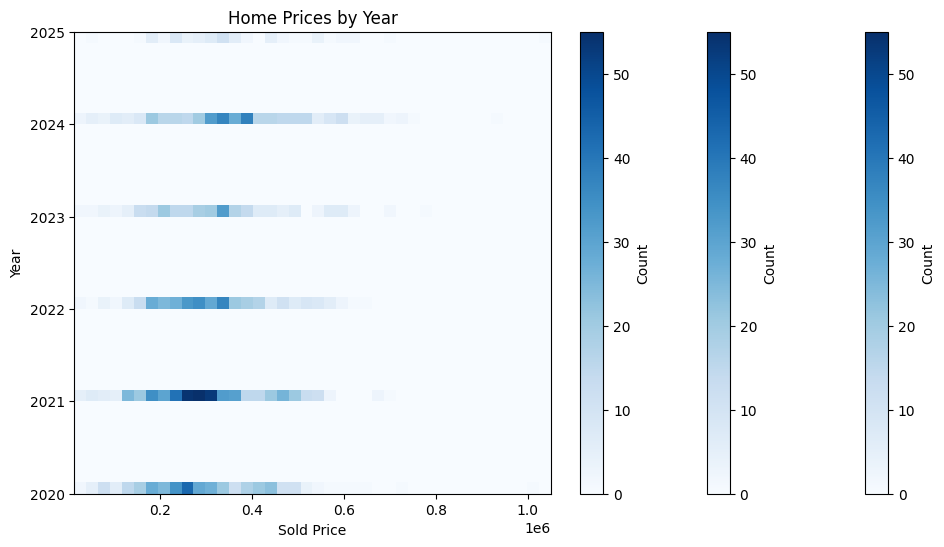

In [15]:
# Display a histogram of the prices by price and year
plt.figure(figsize=(12, 6))
# sns.histplot(data=df, x='SoldPrice',y='year', multiple='stack', bins=40)
#use matplotlib to plot the histogram
plt.hist2d(df['SoldPrice'], df['Year'], bins=40, cmap='Blues')
plt.colorbar(label='Count')
count = 'Count'
#plt.xlabel('Price')
plt.xlabel('Sold Price')
plt.ylabel('Year')
plt.colorbar(label=count)
plt.title('Home Prices by Year')
plt.colorbar(label='Count')
#Show the values on the x-axis
plt.show()
plt.savefig('home_prices_by_year.png')
plt.close()

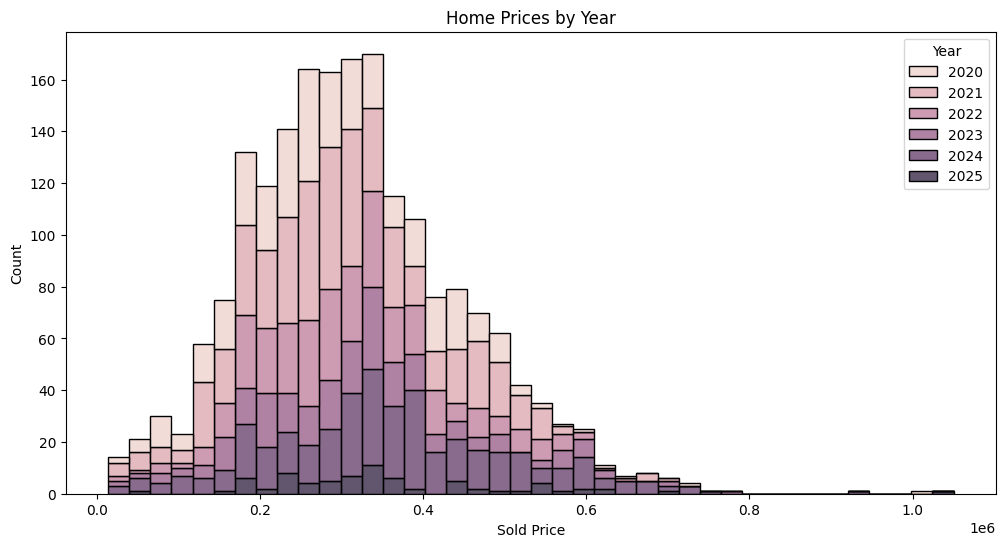

In [16]:
# Display a histogram of the prices by price and year
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='SoldPrice', hue='Year', multiple='stack', bins=40)
plt.xlabel('Sold Price')
plt.ylabel('Count')
plt.title('Home Prices by Year')
plt.show()

In [ ]:
#SPLIT THE DATA INTO TRAINING AND TESTING SETS
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(f'Training set size: {len(train)}')
print(f'Testing set size: {len(test)}')
print(f'Original set size: {len(df)}')
print(f'Original set size: {len(df)}')
print(f'Number of unique values in the original set: {df.nunique()}')